# Predict NFL Touchdowns

***

Here in this section I am going to attempt to make a model that will predict nfl touchdowns>

In [1]:
# import required libaries
import pandas as pd
import glob
import os
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 



In [2]:
# Read in multiple csv with same headings to 1 dataframe
# https://stackoverflow.com/questions/20906474/import-multiple-csv-files-into-pandas-and-concatenate-into-one-dataframe
path = '.\Data\Pred_data'
all_files = glob.glob(os.path.join(path, "*.csv"))

df = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)

C:\Users\elyn\AppData\Local\Temp\ipykernel_10288\756877225.py:6: DtypeWarning: Columns (179,180,182,183,189,190,193,194,197,198,203,204,205,206,213,214,218,219,220,222,224,226,248,249,253,254,255,260,262,263,266,267,268,269,283,284,301) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)
C:\Users\elyn\AppData\Local\Temp\ipykernel_10288\756877225.py:6: DtypeWarning: Columns (179,180,182,183,189,190,193,194,197,198,203,204,205,206,218,219,220,233,234,235,236,237,238,248,249,253,254,255,260,262,263,283,284,301) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)
C:\Users\elyn\AppData\Local\Temp\ipykernel_10288\756877225.py:6: DtypeWarning: Columns (179,180,182,183,189,190,193,194,197,198,203,204,205,206,218,219,220,222,224,226,243,244,245,253,254,255,260,262,263,283,284,301) have mixed types. Specify d

In [3]:
# reset the index as each csv will have its own
df = df.reset_index(drop=True)

In [4]:
# Take a peek
df.sample(20)

,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,...,out_of_bounds,home_opening_kickoff,qb_epa,xyac_epa,xyac_mean_yardage,xyac_median_yardage,xyac_success,xyac_fd,xpass,pass_oe
7952,1551,2020_03_NYJ_IND,2020092708,IND,NYJ,REG,3,IND,home,NYJ,...,0,0,0.137130,NaN,NaN,NaN,NaN,NaN,0.730094,-73.009372
29226,3166,2020_12_ARI_NE,2020112906,NE,ARI,REG,12,ARI,away,NE,...,0,1,-1.292094,NaN,NaN,NaN,NaN,NaN,0.921767,7.823348
84596,1,2021_14_LV_KC,2021121204,KC,LV,REG,14,NaN,NaN,NaN,...,0,0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81240,1030,2021_13_DEN_KC,2021120505,KC,DEN,REG,13,DEN,away,KC,...,0,0,-0.614751,0.632439,3.191149,3.0,1.000000,0.129858,0.758100,24.190003
17956,1841,2020_07_KC_DEN,2020102509,DEN,KC,REG,7,DEN,home,KC,...,0,1,0.364633,0.240913,3.754549,2.0,0.560280,0.060070,0.884983,11.501700
143778,311,2022_17_NYJ_SEA,2023010111,SEA,NYJ,REG,17,SEA,home,NYJ,...,1,1,0.702574,NaN,NaN,NaN,NaN,NaN,0.423671,-42.367059
35582,2988,2020_14_DEN_CAR,2020121300,CAR,DEN,REG,14,NaN,NaN,NaN,...,0,0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
147590,3860,2022_19_LAC_JAX,2023011401,JAX,LAC,POST,19,JAX,home,LAC,...,1,1,1.411047,0.192117,2.987605,1.0,1.000000,0.999076,0.902856,9.714359
64949,2869,2021_06_MIN_CAR,2021101702,CAR,MIN,REG,6,CAR,home,MIN,...,0,1,-0.971354,1.568310,5.295716,4.0,0.405346,0.405346,0.985145,1.485491
110341,2422,2022_04_TEN_IND,2022100207,IND,TEN,REG,4,IND,home,TEN,...,0,1,-0.389726,NaN,NaN,NaN,NaN,NaN,0.473894,-47.389406


In [5]:
# See the shape of the dataframe
print(df.shape)

(149373, 372)


# Grouping the data

***

As you can see this is a fairly large dataframe, in comparison to what I have been using up to now it is enormous. I will not be using all the data here to create my model so I will now begin cleaning and grouping the data I need.

In [6]:
# list all columns in the dataframe 
df.columns.values

array(['play_id', 'game_id', 'old_game_id', 'home_team', 'away_team',
       'season_type', 'week', 'posteam', 'posteam_type', 'defteam',
       'side_of_field', 'yardline_100', 'game_date',
       'quarter_seconds_remaining', 'half_seconds_remaining',
       'game_seconds_remaining', 'game_half', 'quarter_end', 'drive',
       'sp', 'qtr', 'down', 'goal_to_go', 'time', 'yrdln', 'ydstogo',
       'ydsnet', 'desc', 'play_type', 'yards_gained', 'shotgun',
       'no_huddle', 'qb_dropback', 'qb_kneel', 'qb_spike', 'qb_scramble',
       'pass_length', 'pass_location', 'air_yards', 'yards_after_catch',
       'run_location', 'run_gap', 'field_goal_result', 'kick_distance',
       'extra_point_result', 'two_point_conv_result',
       'home_timeouts_remaining', 'away_timeouts_remaining', 'timeout',
       'timeout_team', 'td_team', 'td_player_name', 'td_player_id',
       'posteam_timeouts_remaining', 'defteam_timeouts_remaining',
       'total_home_score', 'total_away_score', 'posteam_score'

In [7]:
# Quarterback statistics to consider
qb_stats = [
    'season', 'passer_id', 'passer', 'pass', 
    'complete_pass', 'interception', 
    'sack', 'yards_gained', 'touchdown'
]

In [10]:
# Grouping criteria
groupby_stats = [
    'season', 'passer_id', 'passer'
]

In [12]:
# Group by and aggregate statistics
qb_aggregated = df[qb_stats].groupby(groupby_stats, as_index=False).sum()

# Randomly sample 10 player-seasons
random_sample = qb_aggregated.sample(n=10)

# Display the random sample as a DataFrame
random_sample_df = pd.DataFrame(random_sample)
print(random_sample_df)

     season   passer_id      passer  pass  complete_pass  interception  sack  \
129    2021  00-0026197     C.Henne    18           11.0           0.0   0.0   
345    2022  00-0036971  T.Lawrence   764          439.0          13.0  31.0   
28     2020  00-0029263    R.Wilson   732          395.0          14.0  52.0   
252    2022  00-0026498  M.Stafford   346          206.0           8.0  29.0   
353    2022  00-0037740    G.Wilson     1            0.0           0.0   0.0   
257    2022  00-0027973    A.Dalton   430          252.0           9.0  25.0   
1      2020  00-0020531     D.Brees   496          322.0           9.0  13.0   
285    2022  00-0033119  J.Brissett   445          236.0           6.0  24.0   
77     2020  00-0034162     J.Scott     1            0.0           0.0   0.0   
243    2021  00-0037012     T.Lance    94           41.0           2.0   4.0   

     yards_gained  touchdown  
129          86.0        0.0  
345        4663.0       30.0  
28         4565.0       45

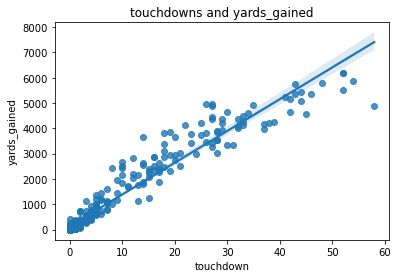

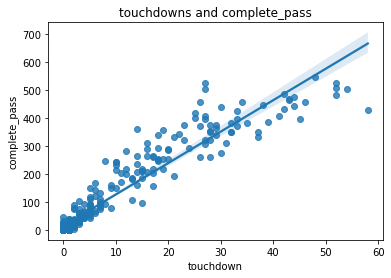

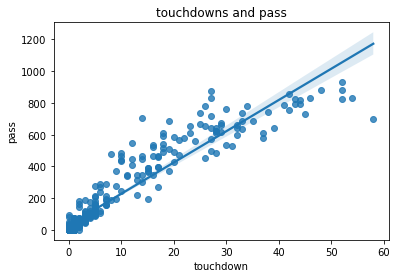

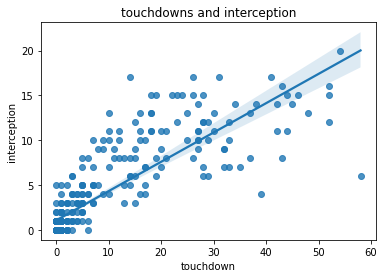

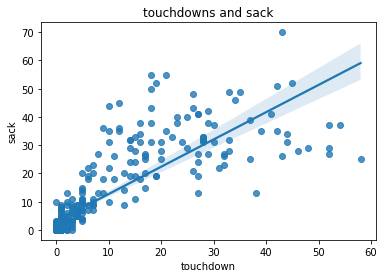

In [13]:
# List of variables to analyze correlation with touchdowns
variables_to_analyze = ['yards_gained', 'complete_pass', 'pass', 'interception', 'sack']

# Iterate over the list of variables
for variable in variables_to_analyze:
    sns.regplot(data=qb_df, x='touchdown', y=variable)
    plt.title(f"Correlation between Touchdowns and {variable}")
    plt.xlabel('Touchdowns')
    plt.ylabel(variable)
    plt.show()

In [ ]:
# Apparently knowing yards gained, 
# completed passes, attempted passes, 
# interceptions, and sacks all correlate with
# touchdowns. Let's see if this is the case for
# _next season_ touchdowns 

# make a copy of the qb dataframe 
_df = qb_df.copy()

# add 1 to season
_df['season'] = _df['season'].add(1)

# merge this back on the original qb dataframe
# specify "on=[]" so we only join on specific 
# columns; specify "suffixes=()" so the duplicate
# column names get a suffix appended to them; 
# specify "how='left'" so this is a left join 
new_qb_df = (qb_df
             .merge(_df, 
                    on=['season', 'passer_id', 'passer'], 
                    suffixes=('', '_prev'), 
                    how='left'))

new_qb_df.sample(10)
     

In [ ]:
# let's see what correlates with 
# next season touchdowns 
for y in ['touchdown_prev','yards_gained_prev', 
          'complete_pass_prev', 'pass_prev', 
          'interception_prev','sack_prev']:
  sns.regplot(data=new_qb_df, x='touchdown', y=y)
  plt.title(f"touchdowns and {y}")
  plt.show()

In [ ]:

# Let's load in machine learning and stats packages
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr

In [ ]:
new_qb_df.sample(10)


In [ ]:
# We will "train" our data on one season and "test"
# on the next season. If you are unfamiliar with
# the concept of train test splitting, I suggest 
# codebasics tutorial https://www.youtube.com/watch?v=fwY9Qv96DJY

# Let's use the previous season performance as
# our features for our model 
features = ['pass_prev', 'complete_pass_prev', 
            'interception_prev', 'sack_prev',
            'yards_gained_prev', 'touchdown_prev']

# We are predicting "current" season touchdowns 
target = 'touchdown' 



In [ ]:
# Let's make a subset of data that has 
# no null values
model_data = (new_qb_df
              .dropna(subset=features+[target]))

# train on 2020 data  
train_data = (model_data
              .loc[model_data['season']==2021])

# test on 2021 data (data the model hasn't seen)
test_data = (model_data
             .loc[model_data['season']==2022])



In [ ]:
# initialize the linear regression
model = LinearRegression()



In [ ]:
print(train_data.shape)

In [ ]:
train_data

In [ ]:
# fit, or "train", the model on the training data
model.fit(train_data.loc[:, features], 
          train_data[target])



In [ ]:
# predict on the test data 
preds = model.predict(test_data.loc[:, features])

# don't forget to set an index so your 
# predictions match the correct rows
preds = pd.Series(preds, index=test_data.index)

# join your predictions back to your test dataset
test_data['preds'] = preds

In [ ]:
# Let's run some basic statistics to examine the
# quality of the prediction

rmse = mean_squared_error(test_data['touchdown'], test_data['preds'])**0.5
r2 = pearsonr(test_data['touchdown'], test_data['preds'])[0]**2
print(f"rmse: {rmse}\nr2: {r2}")

In [ ]:

# Let's visualize the outputs 
sns.regplot(data=test_data, x='touchdown', y='preds')
plt.title('touchdown and predictions')
plt.show()

In [ ]:
test_data.loc[:, ['season', 'passer_id', 'passer', 'touchdown', 'preds']].sort_values('touchdown', ascending=False).head(10)